# Homework 4

## PHYS 2600

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded! To make sure the graded notebook looks like what you expect, we recommend selecting "Runtime > Restart session and run all" from the menu above in Colab before you finish.

In [2]:
## Import cell

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

...

## 4.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on homework #2.  If you got a perfect score, great, tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

### For Me I'm ok in programming so this is just a review, I will try to giving a feedback since I get a full score in HW2, I think the pace of the content great but sometime confusing or it jsut me since I'm a bit strange I need some time to understand what I'm suppose to do


### Important Note

This week's homework is a little bit different than normal; __there is only one problem.__  You should think of this assignment as a "mini-project", building on everything we have learned so far.  Some of the question parts will be a little more open-ended.  This is intended to be a small warm-up for the final projects at the end of the semester.


## 4.1 - Pendulum motion, beyond small angles (38 points)

<!-- <img src="pendulum.png" width=300px /> -->
<img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/homework/hw04/pendulum.png" width=300px />

The motion of a simple pendulum is given by the differential equation

$$
\frac{d^2 \theta}{dt^2} = -\frac{g}{L} \sin \theta
$$

where $\theta$ is the angle of the pendulum with the vertical, so at $\theta = 0$ the pendulum hangs straight down (see drawing).  For simplicity, we'll assume the pendulum is released from rest at initial angle $\theta_0$.


### Part A (4 points)

We will begin, as you did in introductory physics, with the _small-angle approximation_.  If we assume that $\sin \theta \approx \theta$ (which is, indeed, a good approximation at small enough $\theta$), then the equation for $\theta(t)$ becomes

$$
\frac{d^2 \theta}{dt^2} \approx -\frac{g}{L} \theta
$$

which has the general solution

$$
\theta(t) = \theta_0 \cos \left(\sqrt{\frac{g}{L}} t \right).
$$

In small-angle approximation, we can read off the period of oscillations $T$, which is just the time required for the argument of the cosine in $\theta(t)$ to change by $2\pi$:
$$
T = 2\pi \sqrt{\frac{L}{g}}.
$$

In the cell below, I've given you values for $g$, $L$, and $\theta_0$.  Using these values, __make a plot__ of $\theta(t)$, and then __use the plot to check the formula for $T$__.

(This problem is a bit more open-ended than in previous homeworks. That means _you_ decide how to use your plot to show that the formula for $T$ is correct!)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

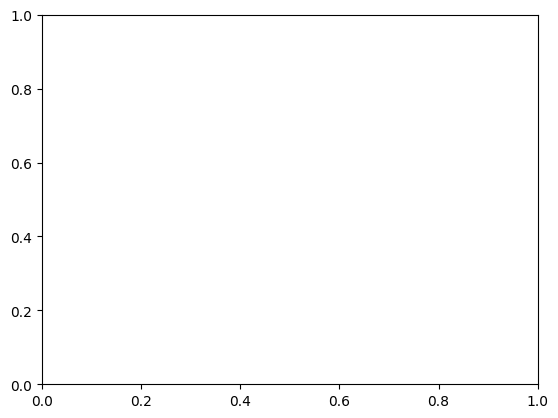

In [4]:
g = 9.8  # m/s^2
L = 2.0  # m
theta_0 = 10 * np.pi / 180  # 10 degrees
t = np.linspace(0, 4, 100)
plt.plot(t, theta_0);



### Part B (6 points)

Now let's try to do something new with our Python knowledge.  Suppose we'd like to know the total distance traveled by the pendulum bob after time $t$.  We can write it as an integral:

$$
D(t) = \int ds = \int L |d\theta| \\
= \int dt \left(L \left| \frac{d\theta}{dt} \right|\right) \\
= \theta_0 \sqrt{gL} \int_0^t dt' \left|\sin \left(\sqrt{\frac{g}{L}} t' \right) \right|.
$$

The absolute value makes this a bit unwieldy to deal with analytically, but it's easy to just do it numerically using the methods we've learned!

In the cell below, __complete the function `dist_small_angle`__, which should compute $D(t)$ using the integral above.  The values of $g$, $L$, and $\theta_0$ are set as global variables, so the function only depends on $t$ and (optionally) on $N$, the number of points to use for the integral.



In [ ]:
g = 9.8  # m/s^2
L = 2.0  # m
theta_0 = 10 * np.pi / 180  # 10 degrees


def dist_small_angle(t, N=100):
    t_int = np.linspace(0, t, N)
    # YOUR IMPLEMENTATION HERE

One case for which it is simple to work out $D(t)$ is when $t=T$, the period of oscillation.  After one period of oscillation, the pendulum returns to its starting point at $\theta_0$.  The total distance traveled is

$$
D(T) = 4L \theta_0
$$

($L\theta_0$ is the length of the arc between $\theta=0$ and $\theta_0$, which is traced out 4 times as the pendulum swings out to $\theta = -\theta_0$ and back to its starting point.)

In the cell below, __make a plot__ showing $D(t)$ vs. $t$.  Your plot should use the provided linspace `t_plot` of 100 points, and should plot $D(t)$ as computed by `D_func`, which you can use with NumPy arrays thanks to `np.vectorize()`.  Your plot __must show the point__ $(T, D(T))$ using the formula above as a __red star__.  This point gives an important test of your code: the curve for $D(t)$ should go through it!


In [ ]:
t_plot = np.linspace(0, 4, 100)
D_func = np.vectorize(dist_small_angle)


Now let's try to go _beyond_ the small-angle approximation.  Without it, there is no analytic solution for $\theta(t)$!  However, we can still find solutions for properties of its motion in terms of (difficult) integrals.  In particular, the general formula for the period $T$ of a pendulum is

$$
T = 4 \sqrt{\frac{L}{2g}} \int_0^{\theta_0} \frac{1}{\sqrt{\cos \theta - \cos \theta_0}} d\theta
$$

This integral has no analytic solution, but we can try to do it numerically.

### Part C (5 points)

Let's start by rewriting the formula above as two different pieces:
$$
T = 4 \sqrt{\frac{L}{2g}} \int_0^{\theta_0} I(\theta, \theta_0)\ d\theta \\
I(\theta, \theta_0) = \frac{1}{\sqrt{\cos \theta - \cos \theta_0}}
$$

It will be instructive to look at the __integrand__ $I(\theta, \theta_0)$ itself, _before_ we actually try to do the integral.  In the cell below, __implement the function `penduluum_I(theta, theta_0)`__, which should
calculate and return an array of values for $I(\theta, \theta_0)$.

In [ ]:
def pendulum_I(theta, theta_0):
    # YOUR IMPLEMENTATION HERE

In [ ]:
## Tests for pendulum_I
import numpy.testing as npt

print(pendulum_I(np.pi / 2, np.pi))
assert (pendulum_I(np.pi / 2, np.pi) - 1) <= 1e-6

print(pendulum_I(np.array([0, np.pi / 4]), np.pi / 2))
npt.assert_allclose(
    pendulum_I(np.array([0, np.pi / 4]), np.pi / 2), np.array([1, 1.189]), atol=1e-3
)

Now use `pendulum_I` to __plot the integrand__ with $\theta_0 = \pi/4$, over the range $\theta =(0, \theta_0)$ (the range of integration.)  Be mindful of the top end of the integration, and don't show the function too close to $\theta_0$.

In [ ]:
th = np.linspace(0, np.pi / 4 - 1e-3, 100)
I = pendulum_I(th, np.pi / 4)

plt.plot(th, I)

### Part D (6 points)

Your plot should show that the integrand diverges at $\theta = \theta_0$, which happens because the denominator goes to zero.  We can't let division by zero happen in our numerical integration, so let's solve the problem by introducing a __cutoff__ to the integral.  Introducing a new parameter $\delta$, we write:

$$
T(\delta) \equiv 4 \sqrt{\frac{L}{2g}} \int_0^{\theta_0 - \delta} I(\theta, \theta_0)\ d\theta
$$
and then the answer we want is $T = \lim_{\delta \rightarrow 0} T(\delta)$.


With our cutoff $\delta$, we can evaluate the integral numerically for any $\delta > 0$.  Then we hope that we can tune $\delta$ small enough to get the answer about right!

__Implement the function `pendulum_T_cutoff(theta_0, delta, num_points)` below__, which should return the period integral result $T(\delta)$.  This function should use `np.trapezoid()` to calculate the integral.  We'll hard-code $L = 2$ meters for simplicity.

In [ ]:
def pendulum_T_cutoff(theta_0, delta=1e-3, num_points=100000):
    g = 9.8  ## m/s^2
    L = 2  ## m
    # YOUR IMPLEMENTATION HERE

In [ ]:
# Testing cell
import numpy.testing as npt

print(pendulum_T_cutoff(np.pi / 32))
npt.assert_allclose(pendulum_T_cutoff(np.pi / 32), 2.58, atol=0.1)

old_pend_I = pendulum_I
del pendulum_I

try:
    pendulum_T_cutoff(np.pi / 32)
except NameError:
    pass
else:
    raise AssertionError("pendulum_T does not call pendulum_I!")
finally:
    pendulum_I = old_pend_I
    del old_pend_I

npt.assert_allclose(
    pendulum_T_cutoff(np.pi / 32, delta=1e-5, num_points=10000), 2.815, atol=0.001
)

### Part E (4 points)

Now, let's see if we can get the right answer!  If we take a small enough value of $\theta_0$, then the small-angle approximation should work and we should find

$$
T \approx 2\pi \sqrt{\frac{L}{g}} = 2.84
$$

plugging in $g = 9.8$ m/s${}^2$ and $L$=2m.

For this test, take $\theta_0 = \pi/32$.  In the cell below,  use `pendulum_T_cutoff()` to compute $T$ for this value of $\theta_0$.  __What value of `delta`__ gives you an answer which matches the small-angle answer of 2.84 to within an accuracy of 0.01?  (You don't need to find what _range_ of $\delta$ values work - just find any one $\delta$ which gives the right answer.)

In [ ]:
#

So far, so good.  But for us to trust the result of our calculation, we should be able to take the limit $\delta \rightarrow 0$.  In the cell below, __run `pendulum_T_cutoff()` with a smaller value of `delta`__ - take the `delta` you used in the previous cell, and divide it by 1000.  If you don't see much of a change, divide it by $10^6$ instead.

In [ ]:
#

What you should see is __numerical instability__; there is no stable $\delta \rightarrow 0$ limit here!  The contribution of the divergent part of the integrand is so large that it's very hard to deal with just by throwing points at it or cutting it off, basically.

### Part F (6 points)

Since the cutoff method fails badly here, we should try to change variables instead!  It's not so obvious how to find a good change here, but this is a well-known problem, so the answer is well-known too:

$$
T = 4 \sqrt{\frac{L}{g}} \int_0^{\pi/2} \frac{d\phi}{\sqrt{1-\sin^2(\theta_0/2) \sin^2 \phi}}
$$

This makes the integral nice and finite - the denominator doesn't blow up since $\sin^2(\theta_0/2)$ is always less than 1.  (This particular form of the integral is an example of an __elliptic integral__.)

__Implement the function `pendulum_T(theta_0, num_points)` below,__ which should use the transformed integral to calculate and return the period $T$.


In [ ]:
def pendulum_T(theta_0, num_points=1000):
    g = 9.8  ## m/s^2
    L = 2  ## m

    # YOUR IMPLEMENTATION HERE

In [ ]:
npt.assert_allclose(pendulum_T(np.pi / 6), 2.888, atol=0.001)
npt.assert_allclose(pendulum_T(np.pi / 3), 3.046, atol=0.001)

### Part G (4 points)

Now that we have a working and stable function to calculate the period, let's use our knowledge of string formatting to make it a little more user-friendly.  To do this, we will write a "__wrapper function__": that is, a new function that calls `pendulum_T` and then formats the results as a string.

__Implement the function `report_pendulum_T()`__ in the cell below.  It should call `pendulum_T()` to calculate the period for the given `theta_0` and `num_points`, and then __return a string__ which looks like the following:

```
T(theta = 0.1000) = 2.840
```

where the first number is the value of `theta_0`, printed with 4 digits after the decimal point, and the second number is the calculated period $T$ with 3 digits after the decimal.

In [ ]:
def report_pendulum_T(theta_0, num_points=1000):
    # YOUR IMPLEMENTATION HERE

In [ ]:
print(report_pendulum_T(0.1))
print(report_pendulum_T(np.pi / 2))

assert report_pendulum_T(0.1) == "T(theta = 0.1000) = 2.840"
assert report_pendulum_T(np.pi / 2) == "T(theta = 1.5708) = 3.350"

Finally, a victory lap: __run the cell below__ to plot your numerical integral result for $T(\theta_0)$ against the small-angle answer.  You should, of course, see them come together at small $\theta_0$ - now you can see how small the angle really has to be for this approximation to work!

In [ ]:
theta_zeros = np.linspace(np.pi / 16, np.pi - np.pi / 16, 14)
p_T_vec = np.vectorize(pendulum_T)

plt.plot(theta_zeros, p_T_vec(theta_zeros))
plt.axhline(small_angle_T, color="r")
plt.xlabel(r"$\theta_0$")  ## TeX math notation
plt.ylabel("T")